# Problem Statement 1: 
Build a text classification RNN ( Recurrent Neural Network) model using
IMDB dataset. Import the IMDB dataset using tensorflow_datasets and perform the
following tasks.
Tasks to be performed:
• Import the required libraries
• Shuffle the data for training and create batches of text and label pairs
• Encode the text data
Note: The simplest way to process text for training is using the TextVectorization layer.
• Build a sequential model using tf.keras.Sequential function
• Compile the model
• Train the model using train dataset
• Test the data using tset dataset and evaluate the model by passing a sentence
Note: If the prediction is >= 0.0, it is positive else it is negative.


Example:
# Output:
• Import the required libraries
• Shuffle the data for training and create batches of text and label pairs
• Encode the text data
Note: The simplest way to process text for training is using the TextVectorization layer.
Create the layer, and pass the dataset's text to the layer's .adapt method.
• Build a sequential model using tf.keras.Sequential function
• Compile the model
• Train the model using train dataset
• Test the data using tset dataset and evaluate the model by passing a sentence
Note: If the prediction is >= 0.0, it is positive else it is negative.

In [87]:
import tensorflow_datasets as tfds

In [88]:
dataset, info = tfds.load("imdb_reviews", with_info = True,
                          as_supervised=True)

In [89]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        '

In [90]:
train_dataset,test_dataset = dataset['train'],dataset['test']
train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [91]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [92]:
buffer_size = 10000
batch_size = 64
train_dataset = train_dataset.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [93]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy())
  print('labels: ', label.numpy())
  print(len(label.numpy()))

texts:  [b'This film is massively boring and pretentious. There is only one good moment when a sailor shaves Mr Barney\'s(think the purple dinosaur-less pretense) eyebrow. The music is relentlessly cloying-it is sad that Bjork, someone with so much inner beauty, has been brought down to pretentious falsity in her art. The pomp of the tea service makes a beautiful ritual seem vapid. the mythology and culture are not respected in this film they are lifted. Not just from Japanese culture but from another filmmaker...(stay tuned) In a perfect "art imitates life" moment-the crew of the ship finds a giant piece of sh*t. Which is what the audience found in the theatre. There are some set pieces which are very composed and arty without heart---then\xc2\x85prepare for spoilers-I\'m talking to you MR BARNEY.<br /><br />The Emperor has no clothes! Mr. Barney you have been outted! I have seen Jodorowsky\'s HOLY MOUNTAIN. And your thin, fake veil of BS has been lifted. You have stolen your images y

In [2]:
import tensorflow as tf
from tensorflow import keras


In [95]:
# Create Text Vectorization Layer
vocab_size = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=vocab_size)
encoder.adapt(train_dataset.map(lambda text,label:text))

In [96]:
import numpy as np
vocab=np.array(encoder.get_vocabulary())
vocab[0:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [97]:
len(vocab)

1000

In [98]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),output_dim=64,mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [99]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[0.49986127]]


In [100]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [101]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


391/391 [==============================] - 682s 2s/step - loss: 0.6326 - accuracy: 0.6404 - val_loss: 0.4560 - val_accuracy: 0.8036
Epoch 2/10
391/391 [==============================] - 671s 2s/step - loss: 0.4298 - accuracy: 0.8046 - val_loss: 0.3791 - val_accuracy: 0.8370
Epoch 3/10
391/391 [==============================] - 669s 2s/step - loss: 0.3478 - accuracy: 0.8516 - val_loss: 0.3444 - val_accuracy: 0.8510
Epoch 4/10
391/391 [==============================] - 662s 2s/step - loss: 0.3246 - accuracy: 0.8641 - val_loss: 0.3344 - val_accuracy: 0.8542
Epoch 5/10
391/391 [==============================] - 670s 2s/step - loss: 0.3160 - accuracy: 0.8699 - val_loss: 0.3299 - val_accuracy: 0.8552
Epoch 6/10
391/391 [==============================] - 675s 2s/step - loss: 0.3091 - accuracy: 0.8711 - val_loss: 0.3255 - val_accuracy: 0.8568
Epoch 7/10
391/391 [==============================] - 661s 2s/step - loss: 0.3039 - accuracy: 0.8746 - val_loss: 0.3320 - val_accuracy: 0.8562
Epoch 8/10

In [102]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 142s 364ms/step - loss: 0.3161 - accuracy: 0.8629
Test Loss: 0.3161058723926544
Test Accuracy: 0.8628799915313721


In [112]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
predictions

array([[0.7224209]], dtype=float32)

# Problem Statement 2:
Sumanth wants to build an flowers image classification CNN model which can take a flower
image as input and prints the name of flower.
Dataset Description: The dataset consist of 3,700 photos of flowers. The dataset contains five
sub-directories, one per class:
• daisy
• dandelion
• roses
• sunflowers
• tulips
Tasks to be performed:
• Import all the required libraries
• Download the flowers data from URL:
'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_phot
os.tgz' using the Keras; and analyzing the images present in the dataset visualization
• Prepare the data by specifying the image resolution and batch size. Also, Splitting the
dataset into training and validation datasets in 80:20 ratio
• Plot a sample image attributed to each class name present in the original dataset.
• Autotune the data using cache().shuffle().prefetch() function; Also, normalize the data by
deviding it with a number
• Build a sequential CNN model
• Compile the model and print model summary
• Train and validate the model and plot the validation results using a line plot
• Feed the system with an image of a flower and print the prediction along with the accuracy.
Example:
Output:
• Import all the required libraries
• Download the flowers data from URL:
'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_phot
os.tgz' using the Keras; and analyzing the images present in the dataset visualization
• Prepare the data by specifying the image resolution and batch size. Also, Splitting the
dataset into training and validation datasets in 80:20 ratio
• Build a sequential CNN model
• Compile the model and print model summary
• Feed the system with an image of a flower and print the prediction along with the accuracy

In [3]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin = url, untar=True)


228827136/228813984 [==============================] - 2s 0us/step


In [4]:
data_dir

'/root/.keras/datasets/flower_photos'

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                            validation_split=0.2,
                                            subset='training',
                                            image_size = (200,200),
                                            seed=0,
                                            batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [21]:
valid_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                            validation_split=0.2,
                                            subset='validation',
                                            image_size = (200,200),
                                            seed=0,
                                            batch_size=32)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [22]:
for image_batch,labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32,)


In [24]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


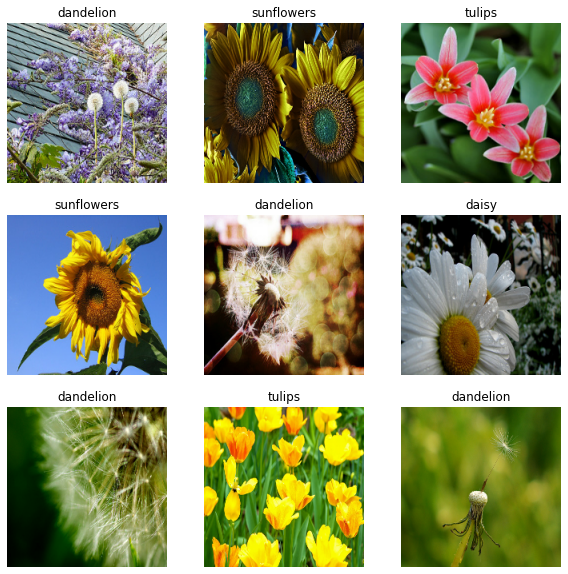

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [28]:
import numpy as np

In [29]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [31]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 160s 2s/step - loss: 1.2784 - accuracy: 0.4530 - val_loss: 1.0971 - val_accuracy: 0.5245
Epoch 2/3
92/92 [==============================] - 139s 2s/step - loss: 1.0197 - accuracy: 0.5981 - val_loss: 1.0335 - val_accuracy: 0.5872
Epoch 3/3
92/92 [==============================] - 139s 2s/step - loss: 0.8415 - accuracy: 0.6805 - val_loss: 0.9919 - val_accuracy: 0.6417


In [40]:
test_loss, test_acc = model.evaluate(valid_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

23/23 [==============================] - 10s 418ms/step - loss: 0.9919 - accuracy: 0.6417
Test Loss: 0.9918969869613647
Test Accuracy: 0.6416893601417542
